## Removendo Linhas Duplicadas ##

In [55]:
# Importando as bibliotecas pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

#Removendo linhas duplicadas
df_sem_duplicatas = df.drop_duplicates()

print(f"Número de linhas antes: {len(df)}")
print(f"Número de linhas depois: {len(df_sem_duplicatas)}")

Número de linhas antes: 10841
Número de linhas depois: 10358


## Gráfico Barras dos 5 apps Mais Instalados ##

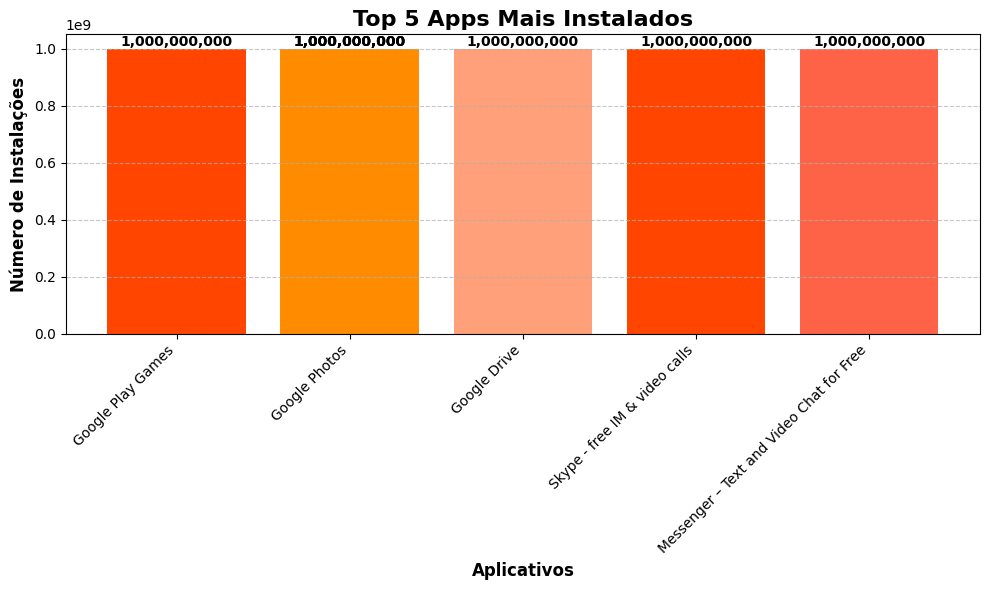

In [29]:
# Importando as bibliotecas pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Certificar que a coluna 'Installs' seja numérica 
df['Installs'] = df['Installs'].replace({'[,+]': '', 'Free': '0'}, regex=True).astype(int)

# Verificar se há pelo menos 5 aplicativos
if df.shape[0] < 5:
    print("A tabela contém menos de 5 aplicativos!")
else:
    # Ordenar o DataFrame pelos aplicativos com mais instalações
    df_ordenado = df.sort_values(by='Installs', ascending=False)

    # Selecionar os 5 aplicativos mais instalados
    top_5_apps = df_ordenado.head(7)

    # Criar o gráfico de barras com uma paleta de cores personalizada
    cores = ['#ff4500', '#ff6347', '#ff7f50', '#ff8c00', '#ffa07a']  
    plt.figure(figsize=(10, 6))

    barras = plt.bar(top_5_apps['App'], top_5_apps['Installs'], color=cores)

    # Adicionar título e rótulos
    plt.title('Top 5 Apps Mais Instalados', fontsize=16, weight='bold')
    plt.xlabel('Aplicativos', fontsize=12, weight='bold')
    plt.ylabel('Número de Instalações', fontsize=12, weight='bold')

    # Adicionar uma grade leve para melhor visualização
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adicionar os valores no topo de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2., altura,
                 f'{altura:,}', ha='center', va='bottom', fontsize=10, weight='bold')

    # Rotacionar os rótulos do eixo x para facilitar a leitura
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Ajuste de layout para que os rótulos não fiquem sobrepostos
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


## Gráfico Pie Chart das Categorias Mais Existentes ##

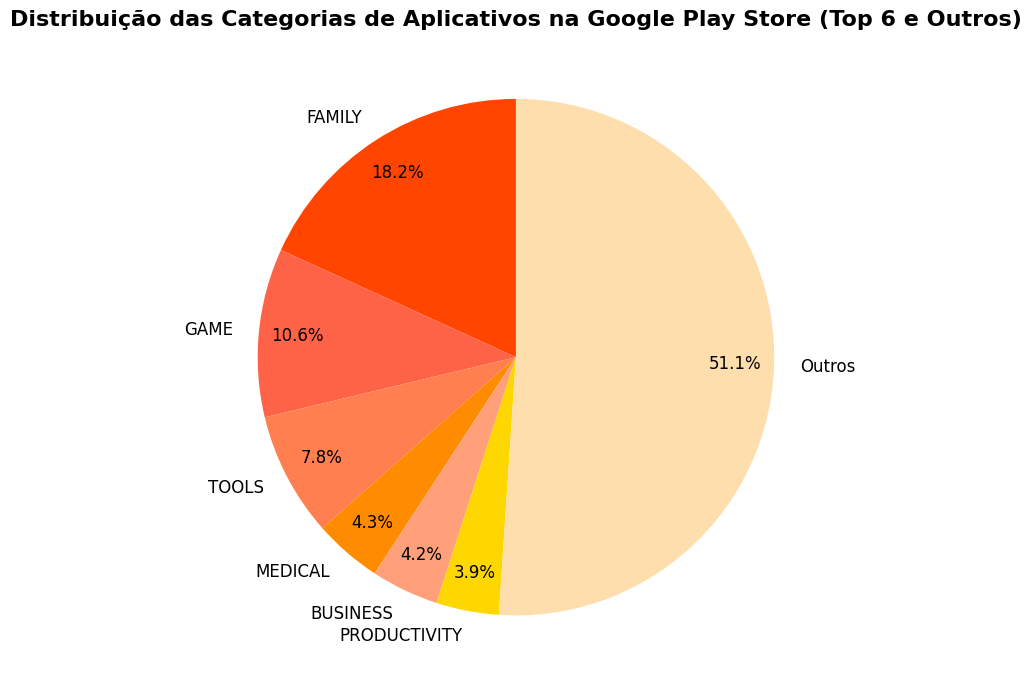

In [30]:
# Importando biblioteca pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV 
df = pd.read_csv('googleplaystore.csv')

# Contar a frequência das categorias
dados_categoria = df['Category'].value_counts()

# Selecionar as 6 principais categorias
top_6_categorias = dados_categoria.head(6)

# Somar as demais categorias e rotulá-las como "Outros"
outros = dados_categoria[6:].sum()

# Adicionar "Outros" ao conjunto de dados
top_6_categorias['Outros'] = outros

# Criar o gráfico de pizza com cores quentes
plt.figure(figsize=(10, 7))

# Paleta de cores quentes
cores_quentes = ['#ff4500', '#ff6347', '#ff7f50', '#ff8c00', '#ffa07a', '#ffd700', '#ffdead']  

# Criar gráfico de pizza 
plt.pie(top_6_categorias, labels=top_6_categorias.index, autopct='%1.1f%%', startangle=90,
        colors=cores_quentes, pctdistance=0.85, textprops={'fontsize': 12})

# Gráfico Circular
plt.gca().set_aspect('equal')

# Título e ajuste visual
plt.title('Distribuição das Categorias de Aplicativos na Google Play Store (Top 6 e Outros)', fontsize=16, weight='bold')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## App Mais Caro do Dataset ##

In [31]:
# Importando biblioteca pandas
import pandas as pd

# Taxa de câmbio
dolar_para_real = 5.3528

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover o caractere '$' da coluna "Price" e converter para numérico
df['Price'] = df['Price'].str.replace('$', '')

# Converter a coluna 'Price' para float, ignorando valores inválidos
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remover linhas onde o valor de 'Price' seja NaN (não numérico)
df = df.dropna(subset=['Price'])

# Encontrar o app mais caro
app_mais_caro = df.loc[df['Price'].idxmax()]

# Converter o preço de dólar para real
preco_em_reais = app_mais_caro['Price'] * dolar_para_real

# Exibir informações do app mais caro
print("O aplicativo mais caro é:")
print(f"Nome do App: {app_mais_caro['App']}")
print(f"Categoria: {app_mais_caro['Category']}")
print(f"Preço em dólares: ${app_mais_caro['Price']}")
print(f"Preço em reais: R${preco_em_reais:.2f}")


O aplicativo mais caro é:
Nome do App: I'm Rich - Trump Edition
Categoria: LIFESTYLE
Preço em dólares: $400.0
Preço em reais: R$2141.12


## Apps Classificados como "Mature 17+" ##

In [8]:
# Importando biblioteca pandas
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Filtrar os apps classificados como "Mature 17+" na coluna 'Content Rating'
apps_mature_17 = df[df['Content Rating'] == 'Mature 17+']

# Contar o número de apps classificados como "Mature 17+"
num_apps_mature_17 = apps_mature_17.shape[0]

# Exibir a quantidade de aplicativos "Mature 17+"
print(f"Número de aplicativos classificados como 'Mature 17+' é: {num_apps_mature_17}")


Número de aplicativos classificados como 'Mature 17+' é: 393


## Lista dos 10 Apps com Mais Reviews ##

In [32]:
# Importando biblioteca Pandas
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Converter a coluna 'Reviews' para numérico 
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Reviews'
df = df.dropna(subset=['Reviews'])

# Ordenar o DataFrame pela coluna 'Reviews' em ordem decrescente
df_sorted = df.sort_values(by='Reviews', ascending=False)

# Selecionar os 10 aplicativos com o maior número de reviews
top_10_apps = df_sorted[['App', 'Reviews']].head(10)

# Exibir os 10 aplicativos com o maior número de reviews
print("Top 10 aplicativos por número de reviews:")
print(top_10_apps)


Top 10 aplicativos por número de reviews:
                                                    App     Reviews
2544                                           Facebook  78158306.0
336                                  WhatsApp Messenger  69119316.0
2545                                          Instagram  66577313.0
335            Messenger – Text and Video Chat for Free  56642847.0
1670                                     Clash of Clans  44891723.0
4005            Clean Master- Space Cleaner & Antivirus  42916526.0
1654                                     Subway Surfers  27722264.0
3665                                            YouTube  25655305.0
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999.0
1660                                       Clash Royale  23133508.0


# Calculos do Dataset #

## Média das Avaliações das 7 Principais Categorias ##

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Remover o aplicativo 'Life Made WI-Fi Touchscreen Photo Frame'
df = df[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

# Converter a coluna 'Rating' para numérico (caso contenha valores inválidos, eles serão convertidos em NaN)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Rating'
df = df.dropna(subset=['Rating'])

# Calcular a média das avaliações por categoria
avg_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Ordenar as categorias pela média das avaliações em ordem decrescente
avg_rating_by_category = avg_rating_by_category.sort_values(by='Rating', ascending=False)

# Selecionar no máximo 7 categorias
top_categories = avg_rating_by_category.head(7)

# Exibir a média das avaliações por categoria
print("Média das avaliações das 7 principais categorias:")
print(top_categories)


Média das avaliações das 7 principais categorias:
               Category    Rating
10               EVENTS  4.435556
8             EDUCATION  4.364407
0        ART_AND_DESIGN  4.357377
3   BOOKS_AND_REFERENCE  4.344970
23      PERSONALIZATION  4.332215
22            PARENTING  4.300000
2                BEAUTY  4.278571


## Gráfico de Avaliações x Categoria (Máximo de 7 Categorias) ##

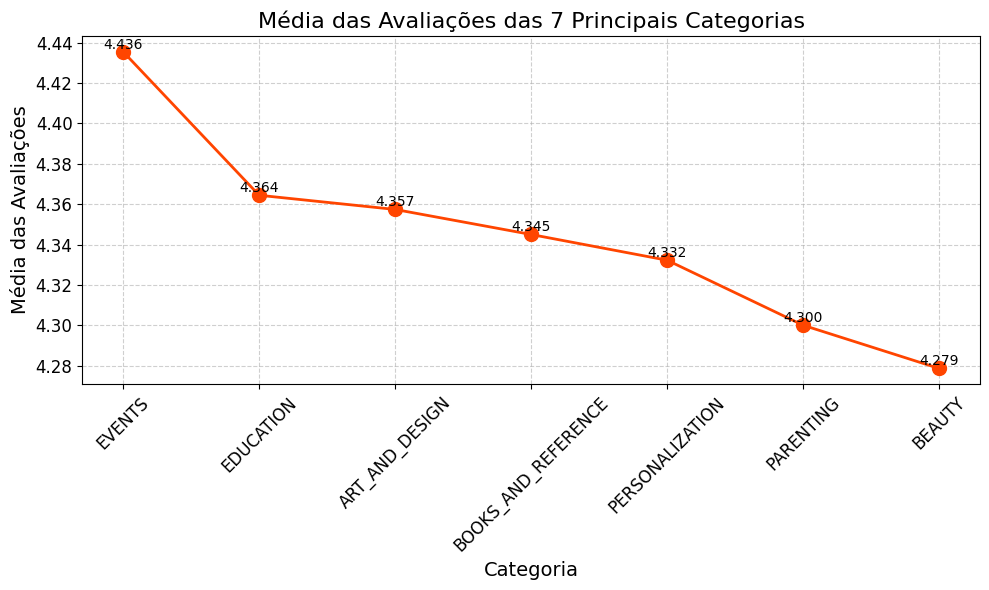

In [18]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Remover o aplicativo problemático
df = df[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

# Converter a coluna 'Rating' para numérico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Rating'
df = df.dropna(subset=['Rating'])

# Calcular a média das avaliações por categoria
avg_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Ordenar as categorias pela média das avaliações em ordem decrescente
avg_rating_by_category = avg_rating_by_category.sort_values(by='Rating', ascending=False)

# Selecionar no máximo 7 categorias
top_categories = avg_rating_by_category.head(7)

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(top_categories['Category'], top_categories['Rating'], 
         marker='o', linestyle='-', color='#ff4500', markersize=10, linewidth=2)

# Adicionar rótulos aos pontos
for i, row in top_categories.iterrows():
    plt.text(row['Category'], row['Rating'], f"{row['Rating']:.3f}", 
             ha='center', va='bottom', fontsize=10, color='black')

# Adicionar título e rótulos dos eixos
plt.title('Média das Avaliações das 7 Principais Categorias', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Média das Avaliações', fontsize=14)

# Rotacionar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionar grade
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Listas e Média dos 03 Aplicativos Mais Baratos e os 03 Aplicativos Mais Caros  ##

In [14]:
# Importando bibliotecas necessárias
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Remover o caractere '$' da coluna "Price" e converter para numérico
df['Price'] = df['Price'].str.replace('$', '')

# Converter a coluna 'Price' para float, ignorando valores inválidos
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Price'
df = df.dropna(subset=['Price'])

# Filtrar apenas aplicativos pagos (preço maior que zero)
df_paid_apps = df[df['Price'] > 0]

# Calcular os 3 aplicativos mais caros
top_3_expensive_apps = df_paid_apps.nlargest(3, 'Price')
average_expensive = top_3_expensive_apps['Price'].mean()

# Calcular os 3 aplicativos mais baratos
top_3_cheapest_apps = df_paid_apps.nsmallest(3, 'Price')
average_cheapest = top_3_cheapest_apps['Price'].mean()

# Exibindo resultados em formato de tabela
print("Top 3 Aplicativos Mais Caros:")
print(top_3_expensive_apps[['App', 'Category', 'Price']].assign(Price=lambda x: x['Price'].map('${:,.2f}'.format)))

print(f"\nMédia dos 3 aplicativos mais caros: ${average_expensive:.2f}")

print("\nTop 3 Aplicativos Mais Baratos:")
print(top_3_cheapest_apps[['App', 'Category', 'Price']].assign(Price=lambda x: x['Price'].map('${:,.2f}'.format)))

print(f"\nMédia dos 3 aplicativos mais baratos: ${average_cheapest:.2f}")


Top 3 Aplicativos Mais Caros:
                           App   Category    Price
4367  I'm Rich - Trump Edition  LIFESTYLE  $400.00
4197    most expensive app (H)     FAMILY  $399.99
4362                💎 I'm rich  LIFESTYLE  $399.99

Média dos 3 aplicativos mais caros: $399.99

Top 3 Aplicativos Mais Baratos:
                                 App Category  Price
2171            All-in-One Mahjong 3   FAMILY  $0.99
2172  World Racers family board game   FAMILY  $0.99
2173   SweetLand — Family Board Game   FAMILY  $0.99

Média dos 3 aplicativos mais baratos: $0.99


## Gráfico dos 03 Aplicativos Mais Baratos ##

C:\Users\STTE\AppData\Local\Temp\ipykernel_18924\1881045904.py:62: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\STTE\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


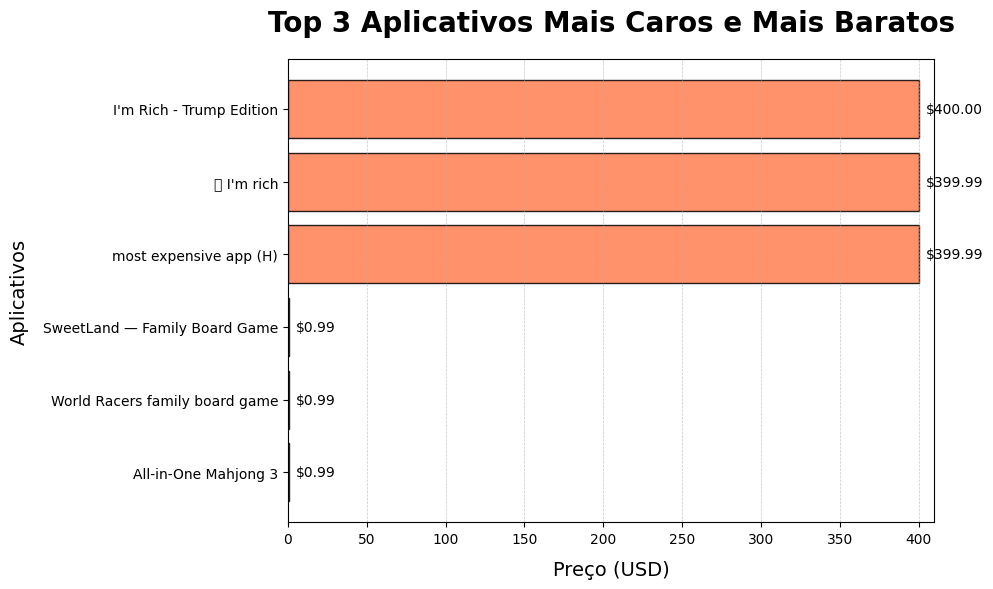

In [28]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

# Remover apps duplicados com base na coluna 'App'
df = df.drop_duplicates(subset=['App'])

# Remover o caractere '$' da coluna "Price" e converter para numérico
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Converter a coluna 'Price' para float, ignorando valores inválidos
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Price'
df = df.dropna(subset=['Price'])

# Filtrar apenas aplicativos pagos (preço maior que zero)
df_paid_apps = df[df['Price'] > 0]

# Calcular os 3 aplicativos mais caros e mais baratos
top_3_expensive_apps = df_paid_apps.nlargest(3, 'Price')
top_3_cheapest_apps = df_paid_apps.nsmallest(3, 'Price')

# Concatenar as duas listas para exibição conjunta no gráfico
combined_apps = pd.concat([top_3_expensive_apps, top_3_cheapest_apps])

# Ordenar as barras de acordo com os preços
combined_apps = combined_apps.sort_values(by='Price')

# Criando o gráfico de colunas horizontais
fig, ax = plt.subplots(figsize=(10, 6))  # Tamanho do gráfico ajustado

# Definindo cores e criando as barras
colors = ['#ff7f50' if i < 3 else '#ff7f50' for i in range(len(combined_apps))]
bars = ax.barh(combined_apps['App'], combined_apps['Price'], 
               color=colors, edgecolor='black', alpha=0.85)

# Adicionando título e rótulos aprimorados
ax.set_title('Top 3 Aplicativos Mais Caros e Mais Baratos', fontsize=20, pad=20, weight='bold')
ax.set_xlabel('Preço (USD)', fontsize=14, labelpad=10)
ax.set_ylabel('Aplicativos', fontsize=14, labelpad=10)

# Ajustando os limites do eixo X
ax.set_xlim(0, combined_apps['Price'].max() + 10)

# Exibindo o valor de cada barra diretamente nas barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(f"${width:.2f}",
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Deslocamento do texto
                textcoords='offset points',
                ha='left', va='center', fontsize=10, color='black')

# Adicionando grades leves para melhorar a leitura
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()
